# Logistic Regression for Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

#matplotlib inline

## Data Loading and Cleaning

In [2]:
from sklearn import datasets
df = pd.read_csv('winequality-red.csv')

def myfunction(x):
    if x > 5:
        return 1
    else:
        return 0
df['quality'] = df['quality'].apply(myfunction)


# 1. Logistic Regression with All Features

In [3]:
X = df.iloc[:,:11]
y = df.iloc[:,-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

begin_time = datetime.datetime.now()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size=0.25)

# Fit our model to the Training set
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42, max_iter = 1000)
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy score for Logistic Regression (all features): ', accuracy_score(y_test, y_pred))

print('Training Duration (1 run): ', datetime.datetime.now()-begin_time)

Accuracy score for Logistic Regression (all features):  0.7325
Training Duration (1 run):  0:00:00.549242


## Confusion Matrix for Logistic Regression (All Features)

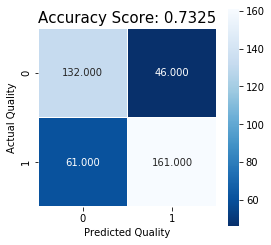

In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for Logistic Regression (all features)

In [6]:
# Getting average run time

def logreg(): 
    begin_time = datetime.datetime.now()
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.25)
    logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42, max_iter = 1000)
    logReg.fit(X_train, y_train)
    y_pred = logReg.predict(X_test)
    #print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred),datetime.datetime.now()-begin_time

In [7]:
runs = 100 #to loop through and get average timing to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = logreg()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   

In [8]:
print('Average Training Duration for logreg processing: ',totaltime/runs)
print('Average Acc for logreg processing: ',totalaccuracy/runs)

Average Training Duration for logreg processing:  0:00:00.325765
Average Acc for logreg processing:  0.7325000000000013


# 2. Logistic Regression with Four Features (Pearson Correlation)

In [9]:
X1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']]
y1 = df.iloc[:,-1]
X1.head()

,volatile acidity,total sulfur dioxide,sulphates,alcohol
0,0.70,34.0,0.56,9.4
1,0.88,67.0,0.68,9.8
2,0.76,54.0,0.65,9.8
3,0.28,60.0,0.58,9.8
4,0.70,34.0,0.56,9.4


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

begin_time = datetime.datetime.now()

# Splitting the dataset into the Training set and Test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42,test_size=0.25)

# Fit our model to the Training set
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42, max_iter = 1000)
logReg.fit(X1_train, y1_train)

y1_pred = logReg.predict(X1_test)

from sklearn.metrics import accuracy_score

print('Accuracy Score for Logistic Regression (4 features): ' ,accuracy_score(y1_test, y1_pred))

print('Training Duration (1 run): ', datetime.datetime.now()-begin_time)

Accuracy Score for Logistic Regression (4 features):  0.715
Training Duration (1 run):  0:00:00.058946


## Confusion Matrix for Logistic Regression (4 Features)

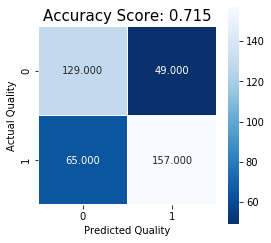

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y1_test, y1_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for Logistic Regression (4 features)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']]
y1 = df.iloc[:,-1] 

def logReg4():
    begin_time = datetime.datetime.now()
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42,test_size=0.25)

    logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42, max_iter = 1000)
    logReg.fit(X1_train, y1_train)
    
    y1_pred = logReg.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    timespent = datetime.datetime.now()-begin_time
    return accuracy, timespent

runs = 100 
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = logReg4()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   

print('Average Accuracy Score for Logistic Regression (4 features): ', totalaccuracy/runs)
print('Average Training Duration for Logistic Regression (4 features): ', totaltime/runs)

Average Accuracy Score for Logistic Regression (4 features):  0.7150000000000019
Average Training Duration for Logistic Regression (4 features):  0:00:00.035901


# 3. Logistic Regression with PCA (6 components)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(df.iloc[:, 0:-1])

pca1 = PCA(n_components = 6)
X2 = pca1.fit_transform(x)
y2 = df['quality'] 

begin_time = datetime.datetime.now()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42,test_size=0.25)

logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42, max_iter = 1000)
logReg.fit(X2_train, y2_train)
    
y2_pred = logReg.predict(X2_test)

from sklearn.metrics import accuracy_score

print('Accuracy score for Logistic Regression with PCA (6 components): ', accuracy_score(y2_test, y2_pred))

print('Training Duration (1 run): ', datetime.datetime.now()-begin_time)

Accuracy score for Logistic Regression with PCA (6 components):  0.725
Training Duration (1 run):  0:00:00.009994


## Confusion Matrix for Logistic Regression with PCA (6 components)

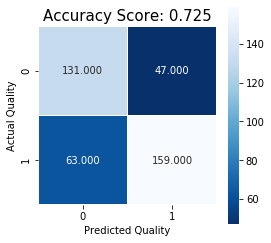

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y2_test, y2_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for Logistic Regression with PCA (6 components)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = StandardScaler().fit_transform(df.iloc[:, 0:-1])
pca1 = PCA(n_components = 6)
X2 = pca1.fit_transform(x)
y2 = df['quality'] 


def logRegPCA6():
    begin_time = datetime.datetime.now()
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42,test_size=0.25)

    logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42, max_iter = 1000)
    logReg.fit(X2_train, y2_train)
    
    y2_pred = logReg.predict(X2_test)
    accuracy = accuracy_score(y2_test, y2_pred)
    timespent = datetime.datetime.now()-begin_time
    return accuracy, timespent

runs = 100
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = logRegPCA6()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   

print('Average Accuracy Score for Logistic Regression (6 Principal Components): ', totalaccuracy/runs)
print('Average Training Duration for Logistic Regression (6 Principal Components): ', totaltime/runs)

Average Accuracy Score for Logistic Regression (6 Principal Components):  0.7250000000000001
Average Training Duration for Logistic Regression (6 Principal Components):  0:00:00.008513
